In [2]:
from DataLoader import DataLoader
import warnings
warnings.simplefilter(action='ignore')

from tqdm import tqdm
import numpy as np
import pandas as pd


dl = DataLoader(handle_nans="drop")




Loading Robinhood data
Loading CRSP data


In [3]:
dl.merge_dfs()


Merging...


In [35]:
df = dl.df_merged
df["holders_rank"] = df.groupby("date")["holders"].rank(ascending=False)
#df = df[df["holders_rank"]<0.025*5221]

df["daily_holders"] = df[["date", "holders"]].groupby("date")["holders"].transform("sum")

df

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,holders_rank
0,2018-05-02,A,590.000000,3.336986,176.806240,11.0,2240482.0,65.91,322477000.0,2.125446e+10,38886.900000,NaN,5.239962e+06,0.000113,1018.0
1,2018-05-03,A,586.473684,3.347945,175.174218,11.0,2365851.0,66.34,322477000.0,2.139312e+10,38906.664211,-3.526316,5.248722e+06,0.000112,1023.5
2,2018-05-04,A,587.458333,3.358904,174.895833,11.0,1331017.0,67.00,322477000.0,2.160596e+10,39359.708333,0.984649,5.246256e+06,0.000112,1026.0
3,2018-05-07,A,585.900000,3.391781,172.741115,11.0,1468735.0,67.39,322477000.0,2.173173e+10,39483.801000,-1.558333,5.236044e+06,0.000112,1029.0
4,2018-05-08,A,577.125000,3.402740,169.605978,11.0,1916103.0,67.37,322477000.0,2.172528e+10,38880.911250,-8.775000,5.242656e+06,0.000110,1046.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914450,2020-08-07,ZYNE,32151.291667,11.502732,2795.100416,11.0,542213.0,4.22,29255000.0,1.234561e+08,135678.450833,-78.916667,3.259810e+07,0.000986,171.0
2914451,2020-08-10,ZYNE,32060.833333,11.523224,2782.279787,11.0,584599.0,4.24,29255000.0,1.240412e+08,135937.933333,-90.458333,3.266178e+07,0.000982,170.0
2914452,2020-08-11,ZYNE,31939.875000,11.530055,2770.140818,11.0,449620.0,4.07,29255000.0,1.190679e+08,129995.291250,-120.958333,3.269811e+07,0.000977,171.0
2914453,2020-08-12,ZYNE,31851.578947,11.536885,2760.847340,11.0,980844.0,3.96,29255000.0,1.158498e+08,126132.252632,-88.296053,3.268230e+07,0.000975,171.0


In [36]:
df[["holders", "date"]].groupby("date").sum()

,holders
date,
2018-05-02,5.239962e+06
2018-05-03,5.248722e+06
2018-05-04,5.246256e+06
2018-05-07,5.236044e+06
2018-05-08,5.242656e+06
...,...
2020-08-07,3.259810e+07
2020-08-10,3.266178e+07
2020-08-11,3.269811e+07


In [37]:
dl.df_merged[["date", "holders"]].groupby("date").transform('sum')

,holders
0,5.239962e+06
1,5.248722e+06
2,5.246256e+06
3,5.236044e+06
4,5.242656e+06
...,...
2914450,3.259810e+07
2914451,3.266178e+07
2914452,3.269811e+07
2914453,3.268230e+07


In [38]:
df[["popularity", "date", "holders"]].groupby("date").sum()

,popularity,holders
date,,
2018-05-02,1.0,5.239962e+06
2018-05-03,1.0,5.248722e+06
2018-05-04,1.0,5.246256e+06
2018-05-07,1.0,5.236044e+06
2018-05-08,1.0,5.242656e+06
...,...,...
2020-08-07,1.0,3.259810e+07
2020-08-10,1.0,3.266178e+07
2020-08-11,1.0,3.269811e+07


## Claude

In [39]:
from DataLoader import DataLoader

dl = DataLoader(handle_nans="drop")

dl.merge_dfs()

Loading Robinhood data
Loading CRSP data
Merging...


In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from tqdm.auto import tqdm

# Assuming your dataframe is loaded as df
# First, let's create some time-based features

def calculate_features(df):
    """Calculate engineered features from Robintrack data"""
    
    # Create a copy to avoid modifying the original
    data = df.copy()
    
    # 1. Basic transformations
    # Normalize holder counts by users to get percentage
    data['holder_percentage'] = data['holders'] / data['users'] * 100
    
    # Calculate log returns of holders (better for analysis than raw changes)
    data['log_holder_change'] = np.log(data['holders'] / data['holders'].shift(1))
    
    # 2. Create groupby object for ticker-level operations
    grouped = data.groupby('ticker')
    
    # Create empty dataframes for ticker-level metrics
    ticker_metrics = []
    
    # 3. Calculate features for each ticker
    for ticker, group in tqdm(grouped, desc="Processing tickers"):
        # Sort by date
        group = group.sort_values('date')
        
        # Skip if not enough data
        if len(group) < 30:
            continue
            
        # Calculate time-based features
        group['holders_7d_pct_change'] = group['holders'].pct_change(periods=7)
        group['holders_30d_pct_change'] = group['holders'].pct_change(periods=30)
        
        # Volatility metrics
        group['holders_7d_std'] = group['holders'].rolling(7).std()
        group['holders_30d_std'] = group['holders'].rolling(30).std()
        group['holders_7d_cv'] = group['holders_7d_std'] / group['holders'].rolling(7).mean()
        
        # Momentum indicators
        group['holders_7d_ma'] = group['holders'].rolling(7).mean()
        group['holders_30d_ma'] = group['holders'].rolling(30).mean()
        group['ma_cross_signal'] = np.where(group['holders_7d_ma'] > group['holders_30d_ma'], 1, -1)
        
        # Acceleration (second derivative)
        group['holder_change_acceleration'] = group['daily_change_holders'].diff()
        
        # Relationship to price
        group['price_holder_corr_30d'] = group['holders'].rolling(30).corr(group['prc_adj'])
        
        # Calculate retail concentration
        group['retail_concentration'] = group['mc_retail'] / group['mc'] * 100
        
        # Identify trend strength using linear regression slope
        if len(group) >= 30:
            for window in [30, 90]:
                if len(group) >= window:
                    group[f'trend_strength_{window}d'] = group['holders'].rolling(window=window).apply(
                        lambda x: stats.linregress(np.arange(len(x)), x)[0] / np.mean(x), raw=True
                    )
        
        # Relative strength compared to overall market
        group = group.dropna(subset=['holders'])
        
        # Add back to the list
        ticker_metrics.append(group)
    
    # Combine all ticker data
    result = pd.concat(ticker_metrics)
    
    # Fill NaN values for calculated columns
    numeric_cols = result.select_dtypes(include=['float64']).columns
    result[numeric_cols] = result[numeric_cols].fillna(0)
    
    return result

# Function to create ticker-level summary metrics
def create_ticker_summary(df):
    """Create a summary dataframe with one row per ticker"""
    # Group by ticker and calculate aggregate metrics
    with tqdm(total=1, desc="Creating ticker summary") as pbar:
        ticker_summary = df.groupby('ticker').agg({
            'holders': ['mean', 'std', 'min', 'max'],
            'daily_change_holders': ['mean', 'std', 'min', 'max'],
            'prc_adj': ['mean', 'std', 'min', 'max'],
            'holder_percentage': ['mean', 'max'],
            'log_holder_change': ['mean', 'std'],
            'holders_7d_pct_change': ['mean', 'std', 'min', 'max'],
            'holders_30d_pct_change': ['mean', 'std'],
            'holders_7d_cv': 'mean',
            'price_holder_corr_30d': 'mean',
            'retail_concentration': 'mean',
            'trend_strength_30d': 'mean',
            'ma_cross_signal': 'mean'
        })
        
        # Flatten column names
        ticker_summary.columns = ['_'.join(col).strip() for col in ticker_summary.columns.values]
        
        # Add additional derived metrics
        ticker_summary['volatility_ratio'] = ticker_summary['holders_std'] / ticker_summary['holders_mean']
        ticker_summary['holder_range_ratio'] = ticker_summary['holders_max'] / ticker_summary['holders_min']
        pbar.update(1)
    
    return ticker_summary

# Function to identify pattern clusters
def identify_patterns(ticker_summary, n_clusters=6):
    """Identify patterns in the ticker summary data using clustering"""
    with tqdm(total=4, desc="Identifying patterns") as pbar:
        # Select features for clustering
        cluster_features = [
            'holders_mean', 'holders_std', 'daily_change_holders_mean', 
            'holders_7d_pct_change_mean', 'holders_7d_pct_change_std',
            'holders_7d_cv_mean', 'price_holder_corr_30d_mean', 
            'trend_strength_30d_mean', 'volatility_ratio', 'holder_range_ratio'
        ]
        
        # Get subset with features
        X = ticker_summary[cluster_features].copy()
        
        # Debug: Check for infinity and NaN values
        print("Checking for problematic values in features:")
        for col in X.columns:
            inf_count = np.isinf(X[col]).sum()
            nan_count = X[col].isna().sum()
            if inf_count > 0 or nan_count > 0:
                print(f"Column {col}: {inf_count} infinities, {nan_count} NaNs")
                
                # Replace infinities with NaNs, then fill with column median or 0
                X[col] = X[col].replace([np.inf, -np.inf], np.nan)
                if X[col].notna().sum() > 0:  # If there are non-NaN values
                    median_val = X[col].median()
                    X[col] = X[col].fillna(median_val)
                    print(f"  - Replaced with median: {median_val}")
                else:
                    X[col] = X[col].fillna(0)
                    print(f"  - Replaced with zeros")
        
        # Handle missing values and scaling
        X = X.fillna(0)
        
        # Additional safety check for any remaining infinities
        X = X.replace([np.inf, -np.inf], 0)
        
        # Debug: Verify all infinity and NaN values are gone
        inf_remaining = np.isinf(X).sum().sum()
        nan_remaining = X.isna().sum().sum()
        print(f"After fixing: {inf_remaining} infinities, {nan_remaining} NaNs remain")
        
        # Apply standard scaling
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        pbar.update(1)
        
        # PCA for dimensionality reduction
        pca = PCA(n_components=min(5, X.shape[1]))  # Ensure n_components doesn't exceed feature count
        X_pca = pca.fit_transform(X_scaled)
        pbar.update(1)
        
        # Perform KMeans clustering
        kmeans = KMeans(n_clusters=min(n_clusters, len(X)//10 + 1), random_state=42)  # Ensure reasonable number of clusters
        clusters = kmeans.fit_predict(X_pca)
        pbar.update(1)
        
        # Add cluster assignments back to the summary
        ticker_summary['pattern_cluster'] = clusters
        
        # Create feature importance per cluster
        cluster_centers = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_))
        cluster_centers_df = pd.DataFrame(
            cluster_centers, 
            columns=cluster_features
        )
        pbar.update(1)
    
    return ticker_summary, cluster_centers_df, X_pca, pca


# Function to visualize patterns
def visualize_patterns(ticker_summary, X_pca, pca):
    """Create visualizations for the identified patterns"""
    with tqdm(total=2, desc="Creating visualizations") as pbar:
        # PCA scatter plot
        plt.figure(figsize=(16, 8))
        
        scatter = plt.scatter(
            X_pca[:, 0], X_pca[:, 1], 
            c=ticker_summary['pattern_cluster'], 
            cmap='viridis',
            alpha=0.6
        )
        
        plt.colorbar(scatter, label='Cluster')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
        plt.title('Stock Patterns Based on Retail Holder Behavior')
        
        # Add annotations for a few notable stocks
        notable_tickers = ticker_summary.sort_values('holders_mean', ascending=False).head(20).index
        
        for ticker in notable_tickers:
            idx = ticker_summary.index.get_loc(ticker)
            plt.annotate(
                ticker, 
                (X_pca[idx, 0], X_pca[idx, 1]),
                fontsize=8
            )
        
        plt.tight_layout()
        pbar.update(1)
        
        # Create a heatmap of cluster characteristics
        cluster_profile = ticker_summary.groupby('pattern_cluster').mean()
        
        # Select key metrics for heatmap
        profile_cols = [
            'holders_mean', 'holders_7d_pct_change_mean', 
            'holders_7d_cv_mean', 'price_holder_corr_30d_mean',
            'volatility_ratio', 'trend_strength_30d_mean'
        ]
        
        plt.figure(figsize=(14, 6))
        sns.heatmap(
            cluster_profile[profile_cols].T,
            cmap='viridis',
            center=0,
            annot=True,
            fmt='.5f'
        )
        plt.title('Cluster Characteristics')
        plt.tight_layout()
        pbar.update(1)
    
    return notable_tickers, cluster_profile

# Main workflow
def main_analysis(df):
    """Main analysis workflow"""
    # Calculate features
    print("Step 1: Calculating features...")
    features_df = calculate_features(df)
    
    # Create ticker summary
    print("Step 2: Creating ticker summary...")
    ticker_summary = create_ticker_summary(features_df)
    
    # Identify patterns
    print("Step 3: Identifying patterns...")
    ticker_summary, cluster_centers, X_pca, pca = identify_patterns(ticker_summary)
    
    # Visualize patterns
    print("Step 4: Visualizing patterns...")
    notable_tickers, cluster_profile = visualize_patterns(ticker_summary, X_pca, pca)
    
    # Create time series plots for representative tickers
    # Get representative tickers for each cluster
    print("Step 5: Finding representative tickers for each pattern...")
    representative_tickers = []
    
    for cluster in tqdm(range(len(cluster_profile)), desc="Finding representative tickers"):
        # Get top 3 stocks most central to the cluster
        cluster_stocks = ticker_summary[ticker_summary['pattern_cluster'] == cluster]
        
        if len(cluster_stocks) >= 3:
            representative_tickers.append(cluster_stocks.index[:3].tolist())
        else:
            representative_tickers.append(cluster_stocks.index.tolist())
    
    # Flatten the list of representative tickers
    representative_tickers = [ticker for sublist in representative_tickers for ticker in sublist]
    
    print(f"Analysis complete. Found {len(cluster_profile)} distinct patterns.")
    
    return features_df, ticker_summary, cluster_profile, representative_tickers

# Function to analyze specific patterns
def analyze_pattern(features_df, ticker_symbol, window_size=90):
    """Analyze patterns for a specific ticker"""
    with tqdm(total=1, desc=f"Analyzing {ticker_symbol}") as pbar:
        ticker_data = features_df[features_df['ticker'] == ticker_symbol].sort_values('date')
        
        if len(ticker_data) < window_size:
            return f"Not enough data for {ticker_symbol}"
        
        # Create figure with subplots
        fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
        
        # Plot 1: Holders and Price
        ax1 = axes[0]
        ax1.set_title(f'{ticker_symbol} - Popularity Holders and Price')
        ax1.plot(ticker_data['date'], ticker_data['popularity'], 'b-', label='popularity')
        ax1.set_ylabel('Number of Holders', color='b')
        ax1.tick_params(axis='y', labelcolor='b')
        
        ax1b = ax1.twinx()
        ax1b.plot(ticker_data['date'], ticker_data['prc_adj'], 'r-', label='Price')
        ax1b.set_ylabel('Price ($)', color='r')
        ax1b.tick_params(axis='y', labelcolor='r')
        
        # Plot 2: Holder Percentage and Moving Averages
        ax2 = axes[1]
        ax2.set_title(f'{ticker_symbol} - Holder Percentage and Moving Averages')
        ax2.plot(ticker_data['date'], ticker_data['holder_percentage'], 'g-', label='Holder %')
        ax2.plot(ticker_data['date'], ticker_data['holders_7d_ma'], 'b--', label='7-day MA')
        ax2.plot(ticker_data['date'], ticker_data['holders_30d_ma'], 'r--', label='30-day MA')
        ax2.set_ylabel('Holder % and MAs')
        ax2.legend()
        
        # Plot 3: Holder Changes and Price-Holder Correlation
        ax3 = axes[2]
        ax3.set_title(f'{ticker_symbol} - Holder Changes and Price Correlation')
        ax3.plot(ticker_data['date'], ticker_data['daily_change_holders'], 'b-', label='Daily Holder Change')
        ax3.set_ylabel('Daily Change', color='b')
        ax3.tick_params(axis='y', labelcolor='b')
        
        ax3b = ax3.twinx()
        ax3b.plot(ticker_data['date'], ticker_data['price_holder_corr_30d'], 'r-', label='Price-Holder Correlation (30d)')
        ax3b.set_ylabel('Correlation', color='r')
        ax3b.tick_params(axis='y', labelcolor='r')
        ax3b.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        
        plt.tight_layout()
        pbar.update(1)
    
    return fig

In [ ]:

res = main_analysis(df)



Analyzing TSLA: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


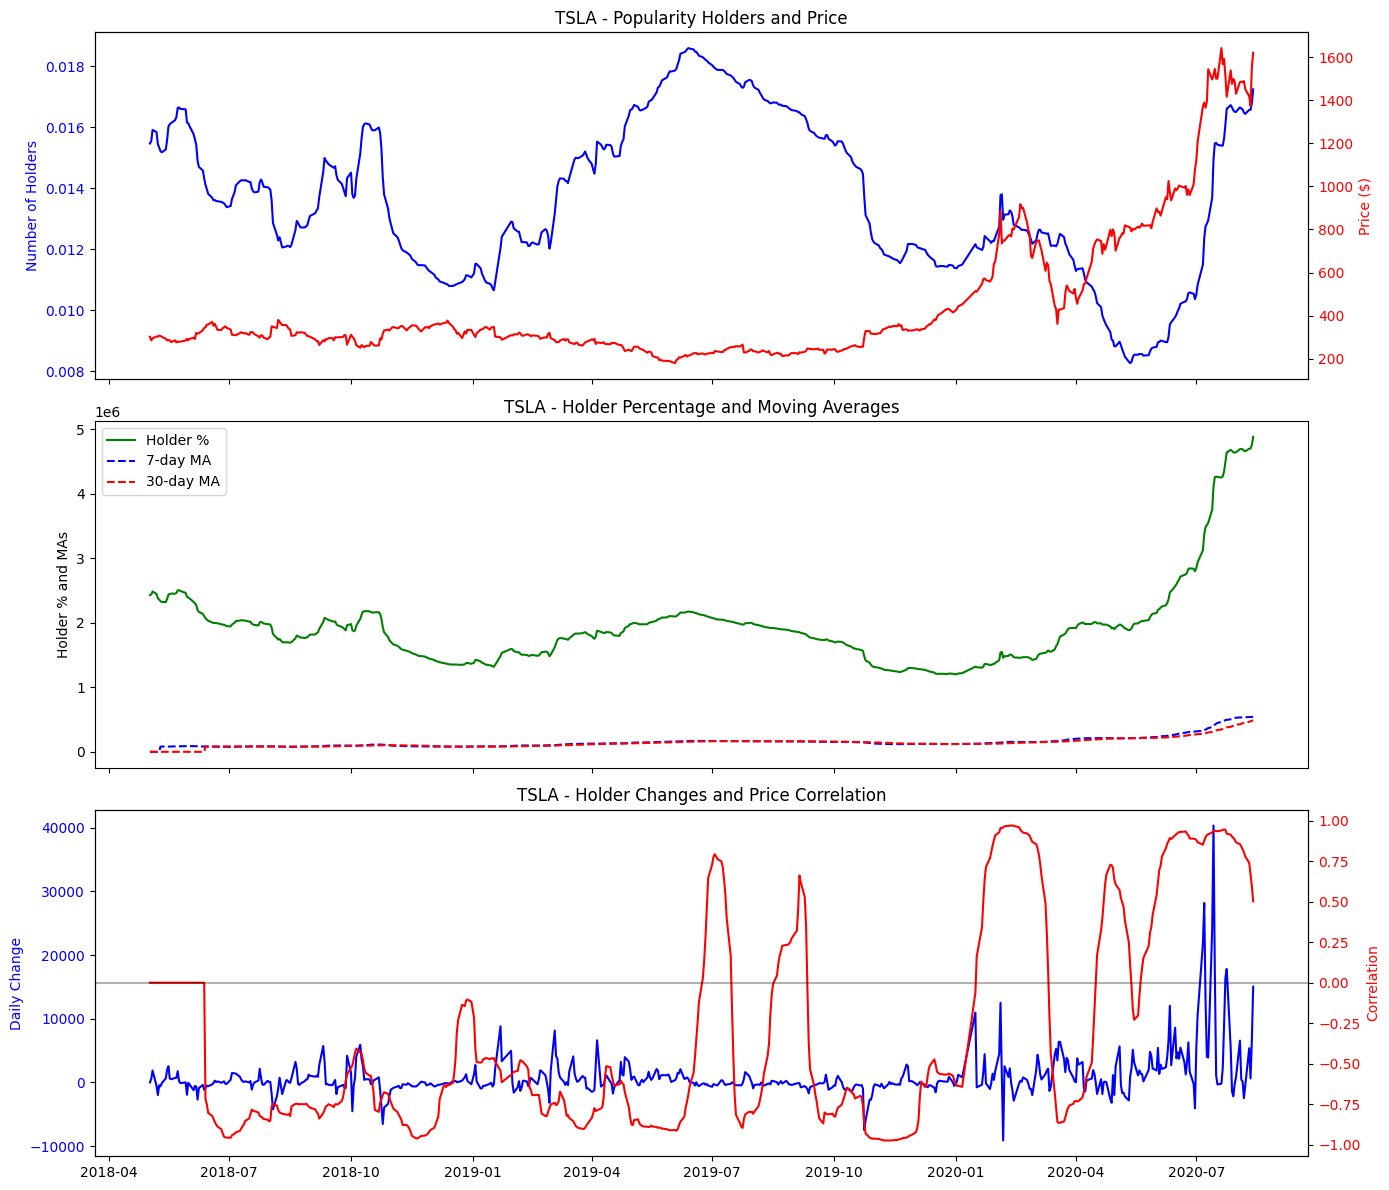

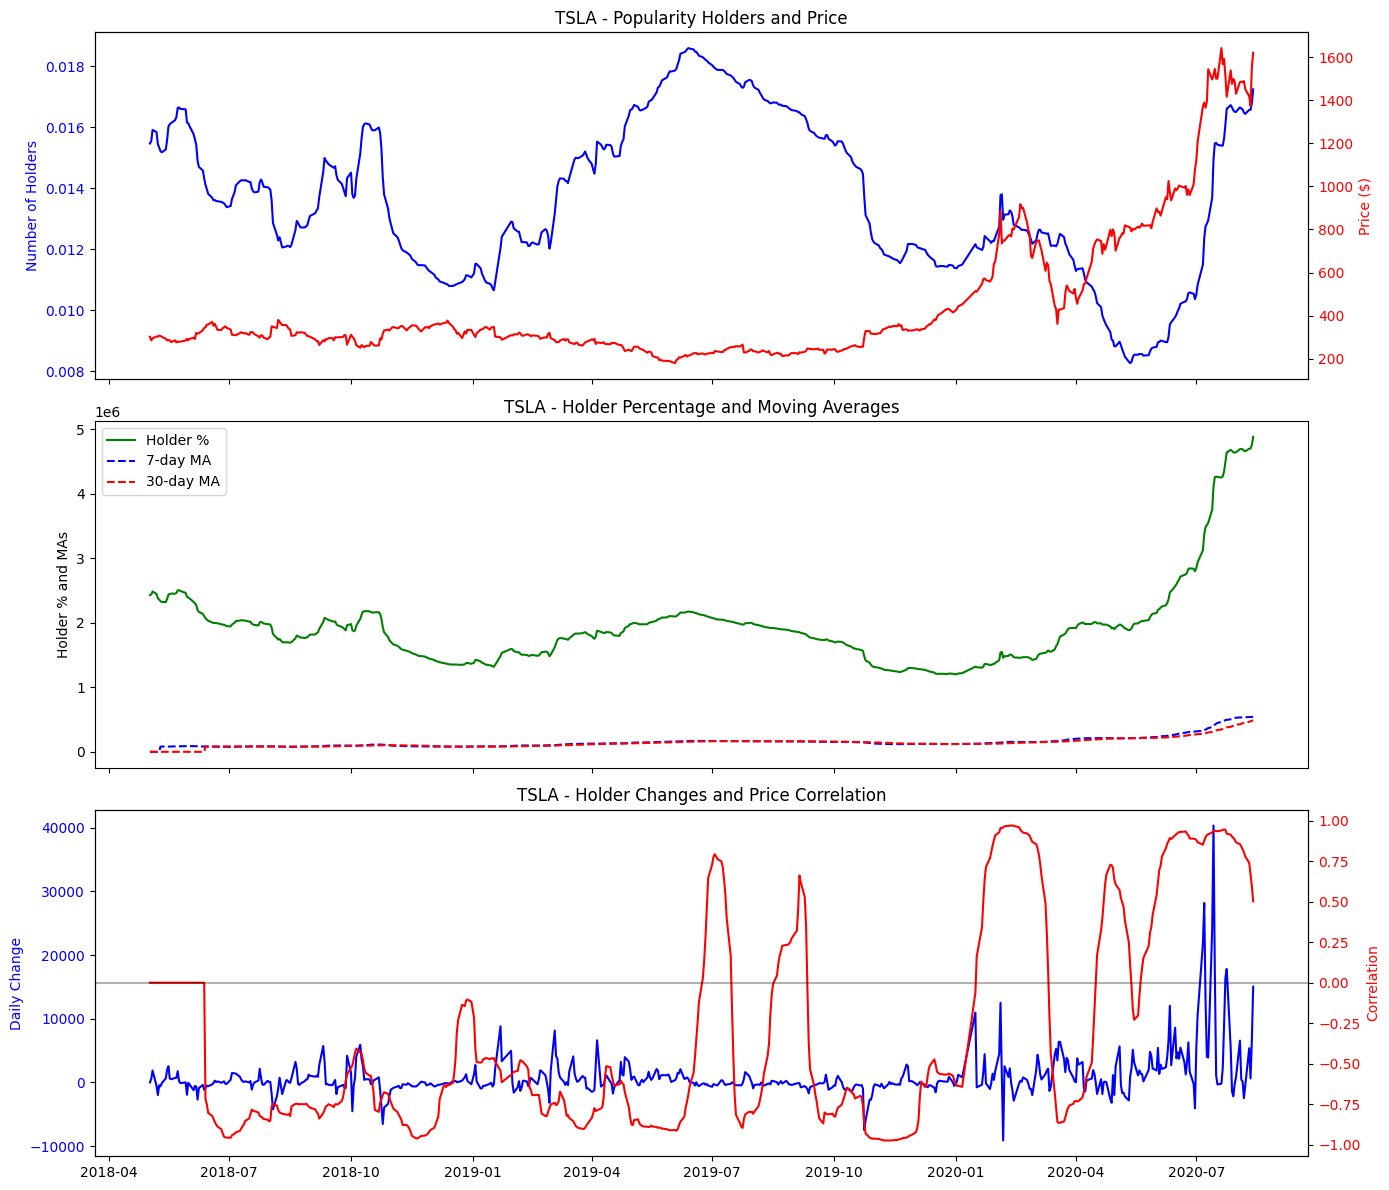

In [7]:
analyze_pattern(res[0], "TSLA")

In [40]:
df[["popularity", "date", "holders"]].groupby("date").sum()

,popularity,holders
date,,
2018-05-02,1.0,5.239962e+06
2018-05-03,1.0,5.248722e+06
2018-05-04,1.0,5.246256e+06
2018-05-07,1.0,5.236044e+06
2018-05-08,1.0,5.242656e+06
...,...,...
2020-08-07,1.0,3.259810e+07
2020-08-10,1.0,3.266178e+07
2020-08-11,1.0,3.269811e+07


In [66]:
df["popularity_change"] = df.groupby("ticker")["popularity"].pct_change()
df = df.replace(np.inf, np.nan)
df = df.dropna()
df.sort_values(by=["popularity_change", "date"], ascending=[True, False][::-1])

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,holders_rank,popularity_change
1350065,2020-03-09,IGOV,1008.958333,10.471311,96.354534,73.0,296058.0,53.09000,16750000.0,8.892575e+08,53565.597917,973.250000,1.282694e+07,0.000079,1288.0,26.952362
406075,2020-03-17,CCNE,413.222222,10.525956,39.257452,11.0,159000.0,21.53000,15248000.0,3.282894e+08,8896.674444,380.830918,1.423457e+07,0.000029,2163.0,11.341286
2604561,2020-04-21,TSC,821.333333,10.765027,76.296447,11.0,1784117.0,12.91000,29763000.0,3.842403e+08,10603.413333,746.159420,2.160872e+07,0.000038,1794.0,9.718071
1739387,2020-01-16,MNTA,1329.941176,10.109290,131.556343,11.0,2784750.0,30.07000,116460000.0,3.501952e+09,39991.331176,1167.941176,1.096158e+07,0.000121,981.0,6.974712
2097712,2020-05-08,PRA,546.416667,10.881148,50.216824,11.0,1828367.0,15.95000,53793000.0,8.579984e+08,8715.345833,473.416667,2.455712e+07,0.000022,2266.0,6.455665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917334,2019-09-16,NWLI,0.000000,8.838356,0.000000,11.0,4104.0,280.04999,3436000.0,9.622518e+08,0.000000,-0.625000,9.831534e+06,0.000000,5150.0,-1.000000
996741,2019-10-17,FMK,0.000000,9.178082,0.000000,73.0,13959.0,36.30000,600000.0,2.178000e+07,0.000000,-0.583333,9.947153e+06,0.000000,5156.5,-1.000000
996753,2019-11-04,FMK,0.000000,9.375342,0.000000,73.0,630.0,37.19000,650000.0,2.417350e+07,0.000000,-0.625000,1.007581e+07,0.000000,5157.5,-1.000000
1099450,2020-01-16,GEC,0.000000,10.109290,0.000000,11.0,7702.0,3.10000,25411000.0,7.877410e+07,0.000000,-61.000000,1.096158e+07,0.000000,5161.5,-1.000000


(2885650, 16)

In [67]:
df[df["ticker"]=="IGOV"]

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,holders_rank,popularity_change
1349617,2018-05-09,IGOV,25.416667,3.413699,7.445492,73.0,103023.0,49.61,22650000.0,1.123666e+09,1260.920833,0.291667,5.249612e+06,0.000005,4237.5,0.010268
1349618,2018-05-10,IGOV,25.708333,3.424658,7.506833,73.0,524564.0,49.84,22650000.0,1.128876e+09,1281.303333,0.291667,5.252226e+06,0.000005,4234.5,0.010972
1349619,2018-05-11,IGOV,24.583333,3.435616,7.155436,73.0,139143.0,49.89,22150000.0,1.105064e+09,1226.462500,-1.125000,5.256641e+06,0.000005,4275.0,-0.044563
1349620,2018-05-14,IGOV,24.000000,3.468493,6.919431,73.0,126901.0,49.77,22150000.0,1.102406e+09,1194.480000,-0.583333,5.268184e+06,0.000005,4291.0,-0.025868
1349621,2018-05-15,IGOV,24.333333,3.479452,6.993438,73.0,432513.0,49.23,22150000.0,1.090444e+09,1197.930000,0.333333,5.287665e+06,0.000005,4279.0,0.010153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350171,2020-08-07,IGOV,754.916667,11.502732,65.629335,73.0,147147.0,53.35,17700000.0,9.442950e+08,40274.804167,-5.916667,3.259810e+07,0.000023,2214.0,-0.009422
1350172,2020-08-10,IGOV,746.875000,11.523224,64.814760,73.0,91707.0,53.30,17700000.0,9.434100e+08,39808.437500,-8.041667,3.266178e+07,0.000023,2227.0,-0.012581
1350173,2020-08-11,IGOV,740.958333,11.530055,64.263211,73.0,120379.0,53.07,17700000.0,9.393390e+08,39322.658750,-5.916667,3.269811e+07,0.000023,2238.0,-0.009024
1350174,2020-08-12,IGOV,738.105263,11.536885,63.977863,73.0,91276.0,53.07,17800000.0,9.446460e+08,39171.246316,-2.853070,3.268230e+07,0.000023,2241.0,-0.003369


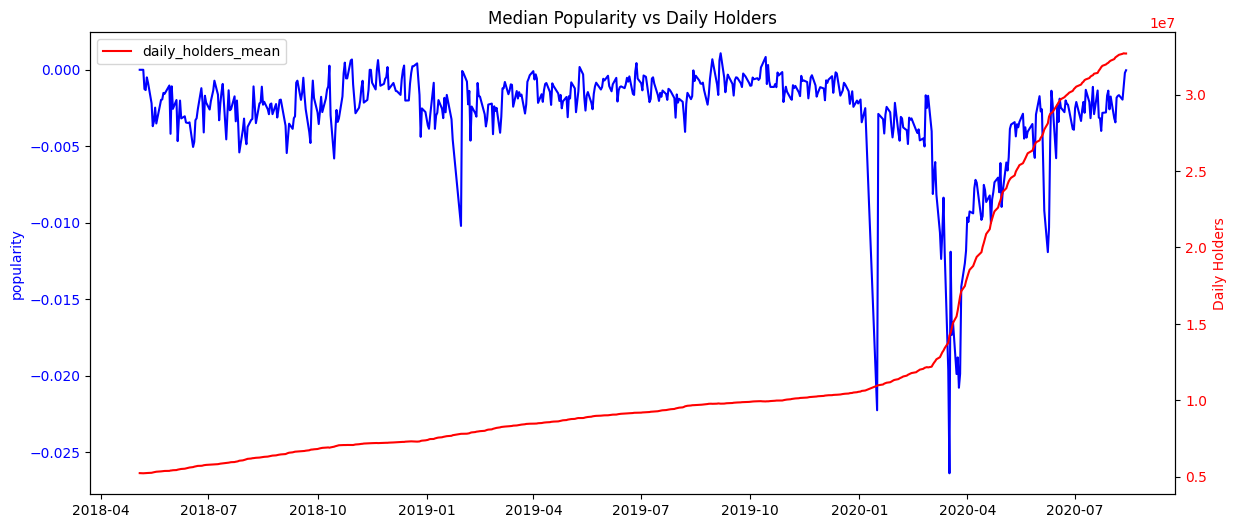

In [65]:
import matplotlib.pyplot as plt



df_plot = df[["date", "daily_holders", "popularity_change"]].groupby("date").agg({
    "daily_holders":"mean",
    "popularity_change":("mean", "median", "sum", "skew", "max")
})
        
# Plot 1: Holders and Price
fig, axes = plt.subplots(1, 1, figsize=(14, 6), sharex=True)
axes.set_title(f'Median Popularity vs Daily Holders')
axes.plot(df_plot.index, df_plot['popularity_change', "median"], 'b-', label='popularity_median')
axes.set_ylabel('popularity', color='b')
axes.tick_params(axis='y', labelcolor='b')

ax1b = axes.twinx()
ax1b.plot(df_plot.index, df_plot['daily_holders',"mean"], 'r-', label='daily_holders_mean')
ax1b.set_ylabel('Daily Holders', color='r')

ax1b.tick_params(axis='y', labelcolor='r')
plt.legend()   
plt.show()

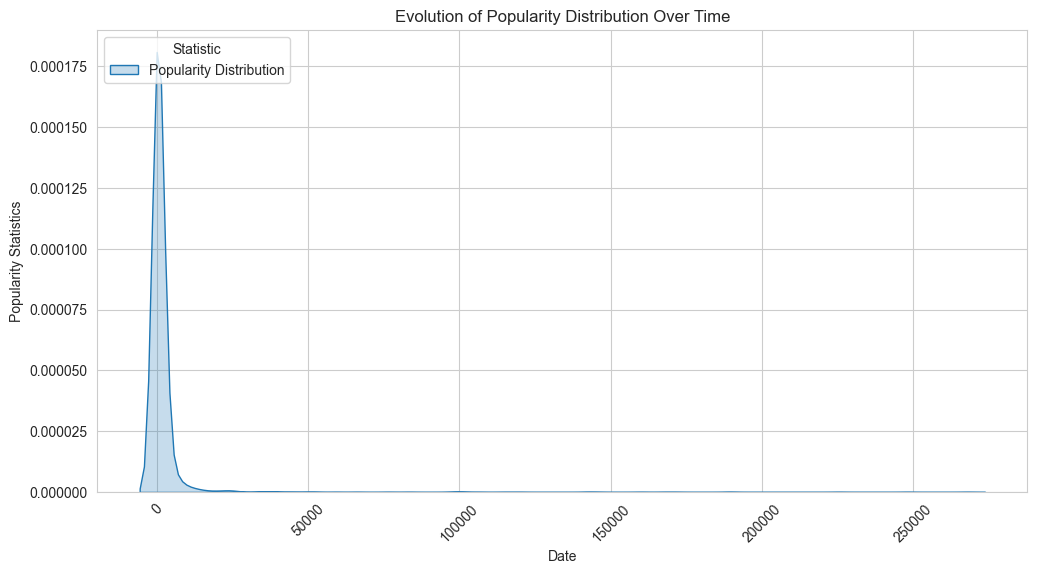

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df = dl.df_merged


# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure and axis
fig = plt.figure(figsize=(12, 6))  # Use plt.subplots() instead of plt.figure()

# Plot key distribution moments on ax
#sns.lineplot(data=popularity_stats, x=popularity_stats.index, y="skew", label="skew", ax=ax)
sns.kdeplot(data=df[df["date"]=="05-02-2019"]["holders"], label="Popularity Distribution", fill=True)


# Formatting
plt.xlabel("Date")
plt.ylabel("Popularity Statistics")
plt.title("Evolution of Popularity Distribution Over Time")
plt.legend(title="Statistic", loc="upper left")
plt.xticks(rotation=45)
#plt.xscale("log")

# Show plot
plt.show()


### Testing regressions

##### XGBoost

In [1]:
from DataLoader import DataLoader
import numpy as np

dl = DataLoader(handle_nans="drop")

dl.merge_dfs()

Loading Robinhood data
Loading CRSP data
Merging...


In [2]:
df = dl.df_merged

In [3]:
df["popularity_change"] = df.groupby("ticker")["popularity"].pct_change()
df = df.replace(np.inf, np.nan)
df = df.dropna()
df.sort_values(by=["popularity_change", "date"], ascending=[True, False][::-1])

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,popularity_change
1350065,2020-03-09,IGOV,1008.958333,10.471311,96.354534,73.0,296058.0,53.09000,16750000.0,8.892575e+08,53565.597917,973.250000,1.282694e+07,0.000079,26.952362
1373475,2018-05-03,IMTE,835.750000,3.347945,249.630728,12.0,858722.0,32.11000,2644000.0,8.489884e+07,26835.932500,805.750000,5.248722e+06,0.000159,26.811834
406075,2020-03-17,CCNE,413.222222,10.525956,39.257452,11.0,159000.0,21.53000,15248000.0,3.282894e+08,8896.674444,380.830918,1.423457e+07,0.000029,11.341286
2604561,2020-04-21,TSC,821.333333,10.765027,76.296447,11.0,1784117.0,12.91000,29763000.0,3.842403e+08,10603.413333,746.159420,2.160872e+07,0.000038,9.718071
320167,2018-05-03,BOXL,519.238095,3.347945,155.091575,11.0,2010766.0,8.33000,9648000.0,8.036784e+07,4325.253333,463.238095,5.248722e+06,0.000099,8.256632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917334,2019-09-16,NWLI,0.000000,8.838356,0.000000,11.0,4104.0,280.04999,3436000.0,9.622518e+08,0.000000,-0.625000,9.831534e+06,0.000000,-1.000000
996741,2019-10-17,FMK,0.000000,9.178082,0.000000,73.0,13959.0,36.30000,600000.0,2.178000e+07,0.000000,-0.583333,9.947153e+06,0.000000,-1.000000
996753,2019-11-04,FMK,0.000000,9.375342,0.000000,73.0,630.0,37.19000,650000.0,2.417350e+07,0.000000,-0.625000,1.007581e+07,0.000000,-1.000000
1099450,2020-01-16,GEC,0.000000,10.109290,0.000000,11.0,7702.0,3.10000,25411000.0,7.877410e+07,0.000000,-61.000000,1.096158e+07,0.000000,-1.000000


In [5]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder



# Drop non-relevant features
df = df.sort_values(by=['ticker', 'date']).reset_index(drop=True)
df = df.drop(columns=["date", "ticker"])  # Remove date (unless used as a feature) and ticker (categorical)

# Encode categorical variables if necessary
label_encoder = LabelEncoder()
df["shrcd"] = label_encoder.fit_transform(df["shrcd"])

# Define features (X) and target variable (y)
X = df.drop(columns=["popularity_change"])
y = df["popularity_change"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",  # For regression problems
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")


In [ ]:
df_test = pd.DataFrame(y_test)
df_pred = pd.DataFrame({"predicted":y_pred}, index=df_test.index)
df_tp = pd.concat([df_pred, df_test], axis=1)
df_tp = df_tp[df_tp.index.isin(df[df["ticker"]=="GPRO"].index)]

# Ensure 'df_tp' has a date column from 'df'
df_tp["date"] = df.loc[df_tp.index, "date"]

# Sort by date
df_tp = df_tp.sort_values(by="date")
print(df_tp.columns)
# Plot again
df_tp.set_index("date")[["popularity_change", "predicted"]].plot(kind="line", figsize=(10,5), title="TSLA Popularity Change")


#### Ridge

In [12]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale features (important for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression (L2 regularized)
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha for more/less regularization
ridge_reg.fit(X_train_scaled, y_train)

# Check feature importance (coefficients)
feature_importance = pd.Series(ridge_reg.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)


# Predictions
y_pred = ridge_reg.predict(X_test_scaled)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute R²
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

feature_importance

R²: 0.0207
RMSE: 0.0529


daily_change_holders    0.006764
holders                -0.003259
vol                     0.001945
shrout_adj             -0.000937
users                  -0.000841
popularity              0.000732
shrcd                  -0.000619
daily_holders           0.000581
mc_retail              -0.000474
mc                      0.000342
prc_adj                 0.000044
holders_adj            -0.000017
dtype: float64

In [14]:
import statsmodels.api as sm

# Add constant for intercept
X_train_const = sm.add_constant(X_train_scaled)

# Fit an OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Print summary (includes p-values, R², confidence intervals)
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:      popularity_change   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     4751.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:05:48   Log-Likelihood:             3.5642e+06
No. Observations:             2034622   AIC:                        -7.128e+06
Df Residuals:                 2034609   BIC:                        -7.128e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002   2.94e-05     -6.323      0.0